In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SAMPLES = 10 ** 6

In [3]:
buyer_mean = 2
buyer_values = np.random.normal(loc=buyer_mean, size=SAMPLES)
seller_values = np.random.normal(size=SAMPLES)

In [4]:
prices = np.arange(min(buyer_mean, 0) - 1, max(0, buyer_mean) + 1.1, 0.1)

In [5]:
value_difference = buyer_values - seller_values
optimal_gain_from_trade = np.where(value_difference < 0, 0, value_difference)
probability_of_trade_happening = np.sum(optimal_gain_from_trade > 0) / len(optimal_gain_from_trade)
probability_of_trade_happening

0.9212557

In [6]:
expected_optimal_gain_from_trade = np.average(optimal_gain_from_trade)
expected_optimal_gain_from_trade

2.0504749685370505

In [7]:
gain_from_mechs = {}

for p in prices:
    buyer_more_than_p = buyer_values >= p 
    seller_less_than_p = seller_values <= p
    accepted_by_mech = np.logical_and(buyer_more_than_p, seller_less_than_p)
    gain_from_mechs[p] = buyer_values[accepted_by_mech] - seller_values[accepted_by_mech] 
    gain_from_mechs[p] = np.pad(gain_from_mechs[p], (0, SAMPLES - np.sum(accepted_by_mech)), mode="constant", constant_values=0)

visualise_results = []

for price, v in gain_from_mechs.items():
    average_gain_from_trade = np.average(v)
    ratio_of_expected_gain = expected_optimal_gain_from_trade / average_gain_from_trade
    visualise_results.append((price, ratio_of_expected_gain))
    print("Price:", price, "Average gain:", average_gain_from_trade, "Approximation to optimal", ratio_of_expected_gain)

Price: -1.0 Average gain: 0.5594296426217068 Approximation to optimal 3.6652955301541055
Price: -0.9 Average gain: 0.6342393661397056 Approximation to optimal 3.232967043684556
Price: -0.8 Average gain: 0.7133724652719045 Approximation to optimal 2.874339939312775
Price: -0.7000000000000001 Average gain: 0.7959528192433117 Approximation to optimal 2.576126271512393
Price: -0.6000000000000001 Average gain: 0.8810713336590575 Approximation to optimal 2.3272519377307415
Price: -0.5000000000000001 Average gain: 0.9680384019955571 Approximation to optimal 2.118175233864804
Price: -0.40000000000000013 Average gain: 1.05609022394307 Approximation to optimal 1.9415717729885775
Price: -0.30000000000000016 Average gain: 1.1439150774660354 Approximation to optimal 1.7925062873366422
Price: -0.20000000000000018 Average gain: 1.2304423983236115 Approximation to optimal 1.666453440917408
Price: -0.1000000000000002 Average gain: 1.3141686309103624 Approximation to optimal 1.5602829958866296
Price: -2

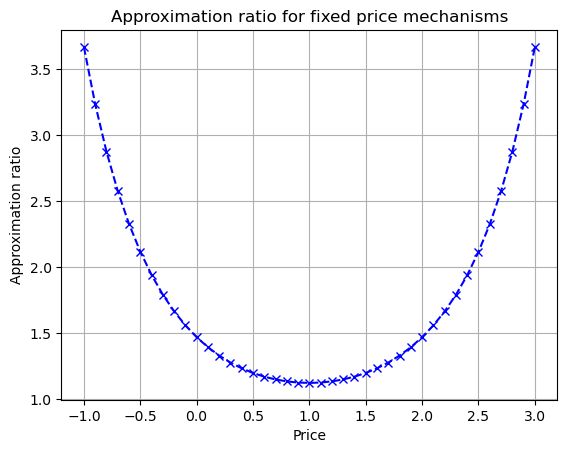

In [8]:
x, y = zip(*visualise_results)
plt.plot(x, y,  marker='x', linestyle='--', color='b')

plt.xlabel('Price')
plt.ylabel('Approximation ratio')
plt.title('Approximation ratio for fixed price mechanisms')

#plt.yscale('log')

# asymptotically_optimal = math.log(1 / probability_of_trade_happening) 
# plt.axhline(y=asymptotically_optimal, color='red', linestyle='--', linewidth=2, label='Asymptotically optimal')

plt.grid(True)
plt.show()